# K-mean algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

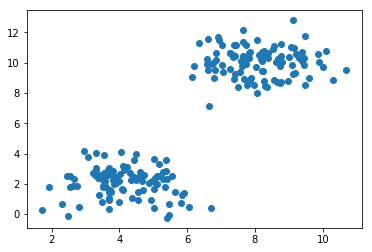

In [22]:
def genGauss(n=100,loc=np.array([0,0]), scale=np.array([1,1])):
    dim = loc.shape[0]
    X = np.random.normal(loc=loc, scale=scale, size=(n,dim))
    return X

In [6]:
def genGaussMix(n=100, p=np.array([.5,.5]), loc=np.array([[-2,0],[2,0]]), scale=np.array([[1,1],[1,1]])):
    k = loc.shape[0]
    lstX = []
    for i in range(k):
        samples = int(round(p[i]*n))
        X = genGauss(n=samples, loc=loc[i,:], scale=scale[i,:])
        Y = np.empty((samples,1))
        Y.fill(i+1)
        lstX.append(np.concatenate((X,Y), axis=1))
    return np.concatenate(lstX, axis=0)

In [ ]:
def plotGaussMix(X):
    k = np.max(X[:,-1])
    plt.figure(figsize=(10,7))
    for i in range(int(k)):
        data = X[X[:,-1] == i+1]
        plt.scatter(data[:,0], data[:,1], label=f'Cluster {i+1}')
    plt.legend()
    plt.show()

In [ ]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
def assignLabel(means, X):
    for t,point in enumerate(X):
        minDistance = 1e12
        for i,mean in enumerate(means):
            if distance(mean, point[:-1]) < minDistance:
                minDistance = distance(mean, point[:-1])
                X[t,-1] = i+1

In [ ]:
def updateMean(X):
    labels = np.unique(X[:,-1])
    means = list()
    for label in labels:
        data = X[X[:,-1] == label]
        means.append(data[:,:-1].mean(axis=0))
    return np.array(means)

In [ ]:
def loss(X, means):
    cost = 0
    for i, mean in enumerate(means):
        data = X[X[:,-1] == i+1][:,:-1]
        cost += np.sum((data-mean)**2)
    return np.sqrt(cost) / X.shape[0]

In [ ]:
def Kmean(X, k, numIter=10):
    means = X[np.random.choice(X.shape[0], k, replace=False), :]
    lst_loss = list()
    labels = np.zeros((X.shape[0],1))
    X = np.concatenate((X,labels), axis=1)
    for i in range(numIter):
        assignLabel(means, X)
        lst_loss.append(loss(X, means))
        means = updateMean(X)
    return X,lst_loss

In [ ]:
n = 300
p = np.array([.5,.3,.2])
loc = np.array([[-2,-1],[2,5],[3,-2]])
scale = np.array([[2,2],[1,1],[1,3]])
X = genGaussMix(n=n,p=p,loc=loc,scale=scale)

In [ ]:
data, lst_loss = Kmean(X[:,:-1],3,numIter=10)
print(lst_loss)